# Asim Jana, Innovation Test


## Data Set


In [345]:
your_local_path="C:/Users/IBM_ADMIN/Desktop/Innovation_test/"

In [507]:
import pandas as pd
import numpy as np
#from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
import warnings
import re

In [487]:
#Load Faculty data
df_faculty=pd.read_csv(your_local_path+"Faculty dataset.csv")
df_faculty.head()

,Institute Name,Percentage of faculty with masters or above,Percentage of faculty with rank associate professor or above,Percentage of faculty that is part time,Average years of experience (Mean),Average years of experience (Bottom Quantile),Percentage of faculty attrition,Faculty Salary (including Benifits) (Mean),Faculty Salary (including Benifits) (Bottom Quantile),Teaching Load (Mean),Teaching Load (Top Quantile),Total Load (Teaching + Non teaching) (Mean),Total Load (Teaching + Non teaching) (Top Quantile)
0,inst123,0.296296,0.222222,0.000000,NaN,NaN,0.555556,NaN,NaN,7.703704,11.0,7.703704,11.0
1,inst125,0.674757,0.597087,0.213592,11.161616,5.0,0.038835,373757.1107,298388.0,10.828495,15.0,10.852767,15.0
2,inst127,0.642857,0.632653,0.183673,14.751701,7.0,0.054422,343933.6497,311294.0,12.352041,15.0,12.705782,16.0
3,inst128,0.837838,0.855856,0.063063,10.304762,4.0,0.153153,294609.3925,268040.0,11.300000,12.0,11.354545,12.0
4,inst129,0.824561,0.456140,0.403509,14.614035,7.0,0.263158,164682.0877,0.0,8.947368,12.0,9.736842,14.0


In [488]:
df_faculty.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m']


In [489]:
df_faculty.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m
0,inst123,0.296296,0.222222,0.000000,NaN,NaN,0.555556,NaN,NaN,7.703704,11.0,7.703704,11.0
1,inst125,0.674757,0.597087,0.213592,11.161616,5.0,0.038835,373757.1107,298388.0,10.828495,15.0,10.852767,15.0
2,inst127,0.642857,0.632653,0.183673,14.751701,7.0,0.054422,343933.6497,311294.0,12.352041,15.0,12.705782,16.0
3,inst128,0.837838,0.855856,0.063063,10.304762,4.0,0.153153,294609.3925,268040.0,11.300000,12.0,11.354545,12.0
4,inst129,0.824561,0.456140,0.403509,14.614035,7.0,0.263158,164682.0877,0.0,8.947368,12.0,9.736842,14.0


In [490]:
#Replace null value with mean value
df_faculty = df_faculty.fillna(df_faculty.mean())

In [491]:
df_faculty.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m
0,inst123,0.296296,0.222222,0.000000,11.974970,5.406977,0.555556,271750.026068,181467.95809,7.703704,11.0,7.703704,11.0
1,inst125,0.674757,0.597087,0.213592,11.161616,5.000000,0.038835,373757.110700,298388.00000,10.828495,15.0,10.852767,15.0
2,inst127,0.642857,0.632653,0.183673,14.751701,7.000000,0.054422,343933.649700,311294.00000,12.352041,15.0,12.705782,16.0
3,inst128,0.837838,0.855856,0.063063,10.304762,4.000000,0.153153,294609.392500,268040.00000,11.300000,12.0,11.354545,12.0
4,inst129,0.824561,0.456140,0.403509,14.614035,7.000000,0.263158,164682.087700,0.00000,8.947368,12.0,9.736842,14.0


In [492]:
df_faculty.info()
df_faculty.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
a    58 non-null object
b    58 non-null float64
c    58 non-null float64
d    58 non-null float64
e    58 non-null float64
f    58 non-null float64
g    58 non-null float64
h    58 non-null float64
i    58 non-null float64
j    58 non-null float64
k    58 non-null float64
l    58 non-null float64
m    58 non-null float64
dtypes: float64(12), object(1)
memory usage: 6.0+ KB


(58, 13)

In [493]:
#Find institute with maximum "Percentage of faculty with masters or above"
df_faculty[df_faculty['b'] == df_faculty['b'].max()]

,a,b,c,d,e,f,g,h,i,j,k,l,m
32,inst164,0.955556,0.985185,0.0,12.118519,5.0,0.02963,271750.026068,181467.95809,5.151852,7.0,5.151852,7.0


In [521]:
#Load Student data
df_student=pd.read_csv(your_local_path+"Student dataset.csv")
df_student.head()

,Institute Name,High School Exit score(Mean),High School Exit score(Bottom Quantile),English Exam score(Mean),English Exam score(Bottom Quantile),Percent of locals in school,Percent of student in UAE curriculum,Percent of students with scholarship,Percent of scholarship coverage,Student Age (Mean),Student Age (Top Quantile),Program Load(Mean),Program Load(Top Quantile),Percentage of students with Internship,Percentage studens in engineering & sciences,Percentage studens in humanities & social sciences,Percentage studens in business,Percentage of students doing bachelors,Number of students
0,inst123,81.01%,75.50%,58.99%,55.56%,100.00%,59.08%,129.68%,77.00%,19.18,20.0,15.80,16.00,100.00%,100.00%,0.00%,0.00%,41.21%,347
1,inst124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00%,0
2,inst125,85.09%,79.00%,62.28%,55.56%,44.66%,50.28%,122.07%,86.64%,22.46,23.0,16.40,16.75,25.55%,45.67%,32.39%,21.94%,72.35%,4662
3,inst126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00%,0
4,inst127,80.99%,73.00%,58.54%,54.50%,26.90%,66.52%,108.76%,31.34%,22.30,24.0,18.59,20.00,4.97%,39.88%,39.30%,20.81%,93.26%,9055


In [522]:
df_student = df_student[df_student["Percentage of students doing bachelors"] != '100.00%']

In [523]:
df_student = df_student.fillna(0)
df_student.head()

,Institute Name,High School Exit score(Mean),High School Exit score(Bottom Quantile),English Exam score(Mean),English Exam score(Bottom Quantile),Percent of locals in school,Percent of student in UAE curriculum,Percent of students with scholarship,Percent of scholarship coverage,Student Age (Mean),Student Age (Top Quantile),Program Load(Mean),Program Load(Top Quantile),Percentage of students with Internship,Percentage studens in engineering & sciences,Percentage studens in humanities & social sciences,Percentage studens in business,Percentage of students doing bachelors,Number of students
0,inst123,81.01%,75.50%,58.99%,55.56%,100.00%,59.08%,129.68%,77.00%,19.18,20.0,15.80,16.00,100.00%,100.00%,0.00%,0.00%,41.21%,347
2,inst125,85.09%,79.00%,62.28%,55.56%,44.66%,50.28%,122.07%,86.64%,22.46,23.0,16.40,16.75,25.55%,45.67%,32.39%,21.94%,72.35%,4662
4,inst127,80.99%,73.00%,58.54%,54.50%,26.90%,66.52%,108.76%,31.34%,22.30,24.0,18.59,20.00,4.97%,39.88%,39.30%,20.81%,93.26%,9055
5,inst128,77.84%,70.30%,59.37%,55.56%,65.11%,76.46%,104.31%,49.21%,25.05,28.0,15.00,15.00,8.65%,12.97%,60.96%,26.07%,85.39%,3594
6,inst129,76.18%,67.50%,58.47%,55.56%,43.84%,80.63%,125.23%,40.99%,24.40,27.0,16.34,17.38,1.19%,37.72%,39.59%,22.68%,92.03%,1177


In [524]:
df_student.info()
df_student.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 58
Data columns (total 19 columns):
Institute Name                                        43 non-null object
High School Exit score(Mean)                          43 non-null object
High School Exit score(Bottom Quantile)               43 non-null object
English Exam score(Mean)                              43 non-null object
English Exam score(Bottom Quantile)                   43 non-null object
Percent of locals in school                           43 non-null object
Percent of student in UAE curriculum                  43 non-null object
Percent of students with scholarship                  43 non-null object
Percent of scholarship coverage                       43 non-null object
Student Age (Mean)                                    43 non-null float64
Student Age (Top Quantile)                            43 non-null float64
Program Load(Mean)                                    43 non-null float64
Program Load(Top Q

(43, 19)

In [525]:
#Remove % symbol
df_student["Percent of students with scholarship"] = df_student["Percent of students with scholarship"].str[:-1].astype(float)

In [514]:
df_student.head()

,Institute Name,High School Exit score(Mean),High School Exit score(Bottom Quantile),English Exam score(Mean),English Exam score(Bottom Quantile),Percent of locals in school,Percent of student in UAE curriculum,Percent of students with scholarship,Percent of scholarship coverage,Student Age (Mean),Student Age (Top Quantile),Program Load(Mean),Program Load(Top Quantile),Percentage of students with Internship,Percentage studens in engineering & sciences,Percentage studens in humanities & social sciences,Percentage studens in business,Percentage of students doing bachelors,Number of students
0,inst123,81.01%,75.50%,58.99%,55.56%,100.00%,59.08%,129.68,77.00%,19.18,20.0,15.80,16.00,100.00%,100.00%,0.00%,0.00%,41.21%,347
2,inst125,85.09%,79.00%,62.28%,55.56%,44.66%,50.28%,122.07,86.64%,22.46,23.0,16.40,16.75,25.55%,45.67%,32.39%,21.94%,72.35%,4662
4,inst127,80.99%,73.00%,58.54%,54.50%,26.90%,66.52%,108.76,31.34%,22.30,24.0,18.59,20.00,4.97%,39.88%,39.30%,20.81%,93.26%,9055
5,inst128,77.84%,70.30%,59.37%,55.56%,65.11%,76.46%,104.31,49.21%,25.05,28.0,15.00,15.00,8.65%,12.97%,60.96%,26.07%,85.39%,3594
6,inst129,76.18%,67.50%,58.47%,55.56%,43.84%,80.63%,125.23,40.99%,24.40,27.0,16.34,17.38,1.19%,37.72%,39.59%,22.68%,92.03%,1177


In [ ]:
# Find maximum Percent of students with scholarship
df_student[df_student["Percent of students with scholarship"] == df_student["Percent of students with scholarship"].max()]

# Load Institutional data

In [527]:
df_Inst=pd.read_csv(your_local_path+"Institutional overview dataset.csv")
df_Inst.head()

,Institute Name,School Acceptance Rate,Student Acceptance Rate,Number of accreditions,Percentage of labs with a size of < 10,Percentage of labs with a size of < 20,Percentage of classes with a size of < 10,Percentage of classes with a size of < 30,Percentage of time spent on remedial / foundation courses,Tuition fee / credit hour,...,Capex - academic / student,Opex - academic / student,Capex - other std expenses / student,Opex - other std / student,Total salaries & benefits expense / student,Total Faculty salaries / student,student/Faculty ratio,Student / Academic support staff ratio,Drop our rate,Time to graduate
0,inst123,0.485185,0.400000,3.0,0.419355,0.854839,0.369668,0.990521,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.268293,28.06666667,0.100865,NaN
1,inst124,0.631944,0.631944,1.0,NaN,NaN,0.000000,0.000000,0.000000,0.00000,...,0.065476,327.380952,0.00000,5565.476190,23571.42857,21607.142860,24.000000,168,NaN,NaN
2,inst125,0.896042,0.735833,5.0,0.093023,0.395349,0.093679,0.654628,0.000000,48960.90347,...,375.049193,1560.647734,0.00000,0.000000,24481.71539,15369.557420,25.776000,72.40449438,0.208494,0.076313
3,inst126,NaN,NaN,NaN,0.227273,0.847507,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.701299,NaN,NaN,NaN
4,inst127,0.943730,0.783601,1.0,0.607949,0.830226,0.250428,0.565317,0.001468,36990.08084,...,486.659388,1675.950973,1528.28592,2952.858482,17355.94757,1706.187249,28.306122,46.90338164,0.112093,0.480568


# Exploratory Data Analysis

In [528]:
#Replace with mean value
df_Inst = df_Inst.fillna(df_Inst.mean())

In [530]:
df_Inst["Student / Academic support staff ratio"] = df_Inst["Student / Academic support staff ratio"].replace("#DIV/0!",0)   
df_Inst = df_Inst.fillna(0)
df_Inst.head()

,Institute Name,School Acceptance Rate,Student Acceptance Rate,Number of accreditions,Percentage of labs with a size of < 10,Percentage of labs with a size of < 20,Percentage of classes with a size of < 10,Percentage of classes with a size of < 30,Percentage of time spent on remedial / foundation courses,Tuition fee / credit hour,...,Capex - academic / student,Opex - academic / student,Capex - other std expenses / student,Opex - other std / student,Total salaries & benefits expense / student,Total Faculty salaries / student,student/Faculty ratio,Student / Academic support staff ratio,Drop our rate,Time to graduate
0,inst123,0.485185,0.400000,3.000000,0.419355,0.854839,0.369668,0.990521,0.000000,40607.833727,...,16632.912913,9840.522588,211.221266,3628.065462,64322.299061,24764.306653,10.268293,28.06666667,0.100865,0.169374
1,inst124,0.631944,0.631944,1.000000,0.279814,0.594841,0.000000,0.000000,0.000000,0.000000,...,0.065476,327.380952,0.000000,5565.476190,23571.428570,21607.142860,24.000000,168,0.174764,0.169374
2,inst125,0.896042,0.735833,5.000000,0.093023,0.395349,0.093679,0.654628,0.000000,48960.903470,...,375.049193,1560.647734,0.000000,0.000000,24481.715390,15369.557420,25.776000,72.40449438,0.208494,0.076313
3,inst126,0.744500,0.569544,2.607143,0.227273,0.847507,0.210342,0.650307,0.065007,40607.833727,...,16632.912913,9840.522588,211.221266,3628.065462,64322.299061,24764.306653,20.701299,0,0.174764,0.169374
4,inst127,0.943730,0.783601,1.000000,0.607949,0.830226,0.250428,0.565317,0.001468,36990.080840,...,486.659388,1675.950973,1528.285920,2952.858482,17355.947570,1706.187249,28.306122,46.90338164,0.112093,0.480568


In [531]:
df_Inst.info()
df_Inst.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 25 columns):
Institute Name                                                          66 non-null object
School Acceptance Rate                                                  66 non-null float64
Student Acceptance Rate                                                 66 non-null float64
Number of accreditions                                                  66 non-null float64
Percentage of labs with a size of < 10                                  66 non-null float64
Percentage of labs with a size of < 20                                  66 non-null float64
Percentage of classes with a size of < 10                               66 non-null float64
Percentage of classes with a size of < 30                               66 non-null float64
Percentage of time spent on remedial / foundation courses               66 non-null float64
Tuition fee / credit hour                                             

(66, 25)

In [532]:
df_Inst.columns = ['Inst_Name','scrt','strt','nac','p10','p20','pc10','p30','pt','tf','tr','te','mrgin','pa','tae','capex','opex','capexo','opexo','tsbes','tfss','sr','sassr','drop_out_rate','ttg']

In [188]:
y=df_Inst.drop_out_rate.astype(float)
feature_cols = ['scrt','strt','nac','p10','p20','pc10','p30','pt','tf','tr','te','mrgin','pa','tae','capex','opex','capexo','opexo','tsbes','tfss','sr','ttg']
x=df_Inst[feature_cols]


In [189]:
x.head()

,scrt,strt,nac,p10,p20,pc10,p30,pt,tf,tr,...,pa,tae,capex,opex,capexo,opexo,tsbes,tfss,sr,ttg
0,0.485185,0.400000,3.000000,0.419355,0.854839,0.369668,0.990521,0.000000,40607.833727,142445.864809,...,0.177348,34866.725121,16632.912913,9840.522588,211.221266,3628.065462,64322.299061,24764.306653,10.268293,0.169374
1,0.631944,0.631944,1.000000,0.279814,0.594841,0.000000,0.000000,0.000000,0.000000,78571.428570,...,0.000000,982.208333,0.065476,327.380952,0.000000,5565.476190,23571.428570,21607.142860,24.000000,0.169374
2,0.896042,0.735833,5.000000,0.093023,0.395349,0.093679,0.654628,0.000000,48960.903470,52907.222070,...,0.000000,6047.108318,375.049193,1560.647734,0.000000,0.000000,24481.715390,15369.557420,25.776000,0.076313
3,0.744500,0.569544,2.607143,0.227273,0.847507,0.210342,0.650307,0.065007,40607.833727,142445.864809,...,0.177348,34866.725121,16632.912913,9840.522588,211.221266,3628.065462,64322.299061,24764.306653,20.701299,0.169374
4,0.943730,0.783601,1.000000,0.607949,0.830226,0.250428,0.565317,0.001468,36990.080840,43837.115150,...,0.000000,5371.652075,486.659388,1675.950973,1528.285920,2952.858482,17355.947570,1706.187249,28.306122,0.480568


In [190]:
y.head()

0    0.100865
1    0.174764
2    0.208494
3    0.174764
4    0.112093
Name: drop_out_rate, dtype: float64

In [191]:
x.corr()

,scrt,strt,nac,p10,p20,pc10,p30,pt,tf,tr,...,pa,tae,capex,opex,capexo,opexo,tsbes,tfss,sr,ttg
scrt,1.000000,0.660963,-0.044097,-0.237150,-0.224364,-0.337552,-0.033707,-0.033400,0.125424,-0.028140,...,-0.084372,0.058096,0.113078,-0.136967,0.143667,-0.205358,-0.168548,-0.399488,0.171524,-0.067831
strt,0.660963,1.000000,-0.230611,-0.257755,-0.115267,-0.310086,-0.155027,-0.109768,-0.078245,-0.180118,...,-0.182625,-0.183273,-0.154850,-0.254509,-0.221774,-0.222551,-0.184815,-0.408912,0.171201,-0.103131
nac,-0.044097,-0.230611,1.000000,-0.011897,-0.047511,-0.060044,-0.038414,0.181152,-0.064713,-0.132871,...,0.140145,-0.105756,-0.079333,-0.132223,-0.072145,-0.149488,-0.151044,-0.097710,0.105595,0.186732
p10,-0.237150,-0.257755,-0.011897,1.000000,0.658812,0.457519,0.135527,-0.041448,-0.074020,0.018159,...,-0.024733,0.016860,0.006463,0.048966,-0.083485,0.150422,0.084789,0.091970,0.015037,0.224214
p20,-0.224364,-0.115267,-0.047511,0.658812,1.000000,0.433303,0.422217,0.116664,-0.030706,0.031073,...,-0.021274,0.024726,0.009079,0.064346,-0.209101,-0.006613,0.095122,0.150129,-0.055689,0.311804
pc10,-0.337552,-0.310086,-0.060044,0.457519,0.433303,1.000000,0.527151,-0.007349,-0.160902,0.105361,...,0.131597,-0.018242,-0.098641,0.136270,-0.107003,0.388956,0.332987,0.366970,-0.299729,0.194847
p30,-0.033707,-0.155027,-0.038414,0.135527,0.422217,0.527151,1.000000,0.208473,0.237035,0.192097,...,0.323209,0.215022,0.175562,0.255156,0.026221,0.182001,0.254732,0.440639,-0.332311,0.263916
pt,-0.033400,-0.109768,0.181152,-0.041448,0.116664,-0.007349,0.208473,1.000000,-0.136734,0.076439,...,0.365514,0.048052,0.013805,0.133739,-0.010073,-0.139869,0.083530,0.339268,-0.072991,0.283240
tf,0.125424,-0.078245,-0.064713,-0.074020,-0.030706,-0.160902,0.237035,-0.136734,1.000000,0.309318,...,-0.122501,0.527022,0.575652,0.349533,0.273194,-0.000825,0.078690,0.094035,-0.223968,-0.165345
tr,-0.028140,-0.180118,-0.132871,0.018159,0.031073,0.105361,0.192097,0.076439,0.309318,1.000000,...,0.523299,0.819495,0.647599,0.897014,-0.047262,-0.077670,0.873279,0.475165,-0.200899,0.069600


# Standardizing the input

**Time for some preprocessing** - Observe how the 'Rings' column has integer values whereas every other column contains floating point numbers.

In [192]:
#Standardizing the input
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_transformed=ss.fit_transform(x.astype(float))
x = x_transformed

In [419]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(52, 23)
(14, 23)
(52,)
(14,)


# Linear Regression

In [420]:
## Building the model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_model=lin_reg.fit(x_train,y_train)
print(lin_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [421]:
# print the coefficients
print (lin_reg.intercept_)
print (lin_reg.coef_)

0.20302861408049258
[ 2.61749873e-02  1.37196960e-02 -6.04744619e-03 -9.63146778e-03
 -5.84554328e-03 -3.00124392e-02  1.64726144e-02 -1.85246835e-02
 -6.92429635e-02  5.97886852e+07 -5.94696243e+07 -1.21922503e+07
 -5.20746720e-02 -2.11076237e-01 -1.61551591e-01  4.40238377e-01
  1.82638353e-03  1.77957112e-02 -2.08008125e-01  2.07639069e-02
 -9.00338758e-03 -4.68411045e-03 -1.55917105e-02]


In [422]:
# pair the feature names with the coefficients
list(zip(feature_cols, lin_reg.coef_))

[('scrt', 0.026174987334723697),
 ('strt', 0.013719695956433102),
 ('nac', -0.006047446190366429),
 ('p10', -0.00963146777537375),
 ('p20', -0.005845543282158015),
 ('pc10', -0.030012439239362098),
 ('p30', 0.016472614387217924),
 ('pt', -0.018524683500625517),
 ('tf', -0.06924296349918964),
 ('tr', 59788685.225531265),
 ('te', -59469624.290392496),
 ('mrgin', -12192250.265816275),
 ('pa', -0.05207467201573565),
 ('tae', -0.21107623712442017),
 ('capex', -0.1615515908996077),
 ('opex', 0.4402383772727769),
 ('capexo', 0.0018263835308568069),
 ('opexo', 0.01779571116083381),
 ('tsbes', -0.2080081251112926),
 ('tfss', 0.020763906914551447),
 ('sr', -0.009003387575912269),
 ('ttg', -0.004684110445361527)]

In [423]:
## Prediction with linear regression model
lin_prd=lin_model.predict(x_test)
print(list(lin_prd))

[0.15352143943959864, 0.20607246013782018, 0.20876869410926494, 0.2723310388689676, 0.1934963934188524, 0.1413397289877573, 0.24721201174611243, 0.10353923068100604, 0.29274458772798456, 1.66802036241347, 0.47791206315809875, 0.36188298315459877, 0.30210237242931515, 0.20607246013782018]


In [424]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, lin_prd)
RMSE = np.sqrt(mean_squared_error(y_test, lin_prd))

# calculate accuracy
print(MAE)
print(RMSE)

0.24963716567934033
0.4493018715319815


# Applying Classification 

In [534]:
df_Inst["drop_out_rate"].mean()

0.1747644275102042

In [535]:
#Considering a Institute is grade A performer if Drop out < 0.15 else grade B performer. i.e. A=0, B=1
df_Inst["drop_out_rt"] = df_Inst["drop_out_rate"].apply(lambda t: 0 if t < 0.15 else 1)

In [536]:
df_Inst
df_Inst[df_Inst["drop_out_rt"] == 1].shape
df_Inst[df_Inst["drop_out_rt"] == 0].shape

(24, 26)

In [537]:
y=df_Inst['drop_out_rt']
#df.drop(df.columns[[0]], axis=1, inplace=True)
del df_Inst['drop_out_rt']
del df_Inst['drop_out_rate']
x=df_Inst

In [538]:
del df_Inst['Inst_Name']
x=df_Inst

In [539]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: drop_out_rt, dtype: int64

In [540]:
x.head()

,scrt,strt,nac,p10,p20,pc10,p30,pt,tf,tr,...,tae,capex,opex,capexo,opexo,tsbes,tfss,sr,sassr,ttg
0,0.485185,0.400000,3.000000,0.419355,0.854839,0.369668,0.990521,0.000000,40607.833727,142445.864809,...,34866.725121,16632.912913,9840.522588,211.221266,3628.065462,64322.299061,24764.306653,10.268293,28.06666667,0.169374
1,0.631944,0.631944,1.000000,0.279814,0.594841,0.000000,0.000000,0.000000,0.000000,78571.428570,...,982.208333,0.065476,327.380952,0.000000,5565.476190,23571.428570,21607.142860,24.000000,168,0.169374
2,0.896042,0.735833,5.000000,0.093023,0.395349,0.093679,0.654628,0.000000,48960.903470,52907.222070,...,6047.108318,375.049193,1560.647734,0.000000,0.000000,24481.715390,15369.557420,25.776000,72.40449438,0.076313
3,0.744500,0.569544,2.607143,0.227273,0.847507,0.210342,0.650307,0.065007,40607.833727,142445.864809,...,34866.725121,16632.912913,9840.522588,211.221266,3628.065462,64322.299061,24764.306653,20.701299,0,0.169374
4,0.943730,0.783601,1.000000,0.607949,0.830226,0.250428,0.565317,0.001468,36990.080840,43837.115150,...,5371.652075,486.659388,1675.950973,1528.285920,2952.858482,17355.947570,1706.187249,28.306122,46.90338164,0.480568


In [541]:
#Standardizing the input
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_transformed=ss.fit_transform(x.astype(float))
x = x_transformed

In [542]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(52, 23)
(52,)
(14, 23)
(14,)


In [543]:
x_train

array([[-4.80516227e-16,  4.43212718e-16,  0.00000000e+00, ...,
         0.00000000e+00, -6.49826286e-01,  0.00000000e+00],
       [-3.44463446e-01,  1.00572011e-01, -6.66844649e-01, ...,
        -5.73857769e-01, -3.39561239e-01, -6.75925963e-01],
       [ 2.65120400e-01,  5.69617928e-01, -2.51919090e-01, ...,
         8.94609716e-03,  5.37712232e-02, -5.14215601e-01],
       ...,
       [-1.28638009e+00, -6.92143158e-01,  5.77932029e-01, ...,
        -3.77740109e-02, -5.73479845e-01, -1.13135515e+00],
       [ 9.07969095e-01, -4.75587189e-01,  1.82270871e+00, ...,
         5.82422588e-01,  5.08890323e-01, -1.01956221e+00],
       [ 6.40337348e-01,  9.51064002e-01, -6.66844649e-01, ...,
         6.18993256e-01,  3.52758906e-01, -1.13135515e+00]])

In [544]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [545]:
lda=LinearDiscriminantAnalysis()
model=lda.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [546]:
model.explained_variance_ratio_

array([1.])

In [547]:
prd=model.predict(x_test)
print(accuracy_score(y_test,prd))
print(confusion_matrix(y_test,prd))

0.6428571428571429
[[1 3]
 [2 8]]


In [548]:
X_train=lda.transform(x_train)
X_test=lda.transform(x_test)

In [549]:
#LDA as classifier
model1=lda.fit(X_train,y_train)

In [550]:
prd1=model1.predict(X_test)
print(accuracy_score(y_test,prd1))
print(confusion_matrix(y_test,prd1))

0.6428571428571429
[[1 3]
 [2 8]]


# Applying PCA

[0.27570087 0.14464125 0.0897096  0.07450007 0.06534385 0.0615043
 0.04943171 0.04030151 0.03877995 0.03181047]


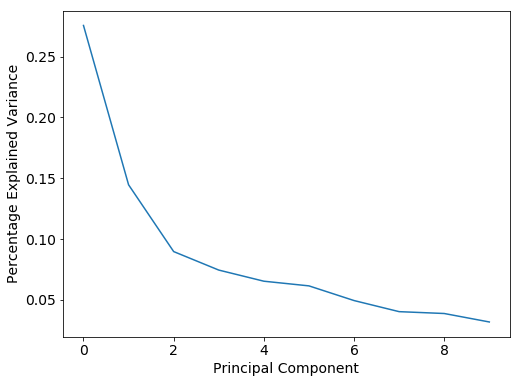

In [551]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=10)
pca_model.fit(x)
print (pca_model.explained_variance_ratio_)
#Plot the explained variance
plt.plot(pca_model.explained_variance_ratio_);
plt.xlabel('Principal Component');
plt.ylabel('Percentage Explained Variance');

In [552]:
df_Inst.head()

,scrt,strt,nac,p10,p20,pc10,p30,pt,tf,tr,...,tae,capex,opex,capexo,opexo,tsbes,tfss,sr,sassr,ttg
0,0.485185,0.400000,3.000000,0.419355,0.854839,0.369668,0.990521,0.000000,40607.833727,142445.864809,...,34866.725121,16632.912913,9840.522588,211.221266,3628.065462,64322.299061,24764.306653,10.268293,28.06666667,0.169374
1,0.631944,0.631944,1.000000,0.279814,0.594841,0.000000,0.000000,0.000000,0.000000,78571.428570,...,982.208333,0.065476,327.380952,0.000000,5565.476190,23571.428570,21607.142860,24.000000,168,0.169374
2,0.896042,0.735833,5.000000,0.093023,0.395349,0.093679,0.654628,0.000000,48960.903470,52907.222070,...,6047.108318,375.049193,1560.647734,0.000000,0.000000,24481.715390,15369.557420,25.776000,72.40449438,0.076313
3,0.744500,0.569544,2.607143,0.227273,0.847507,0.210342,0.650307,0.065007,40607.833727,142445.864809,...,34866.725121,16632.912913,9840.522588,211.221266,3628.065462,64322.299061,24764.306653,20.701299,0,0.169374
4,0.943730,0.783601,1.000000,0.607949,0.830226,0.250428,0.565317,0.001468,36990.080840,43837.115150,...,5371.652075,486.659388,1675.950973,1528.285920,2952.858482,17355.947570,1706.187249,28.306122,46.90338164,0.480568


In [553]:
x_pca = PCA(n_components=2)
#Build a PCA model with just the training data
train_pca = x_pca.fit_transform(x_train)
#Fit the test data to the above PCA model
test_pca = x_pca.fit_transform(x_test)

In [554]:
test_pca

array([[-2.7128781 , -0.32335984],
       [-0.59978624,  0.05744736],
       [-1.30503468,  0.24446185],
       [-1.08437614, -0.06379495],
       [-2.50524683, -1.71307511],
       [-1.0983088 ,  0.52319026],
       [-1.86414639, -1.23103812],
       [-0.69932784,  5.40063962],
       [-1.05966956, -0.51350135],
       [ 8.70386657,  3.20455773],
       [ 8.0637417 , -4.22057487],
       [-2.2344026 , -1.11802095],
       [-1.00464484, -0.30437901],
       [-0.59978624,  0.05744736]])

In [555]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
pcalg = LogisticRegression(C=1e42)

# fit model
pcalg.fit(train_pca, y_train)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(204,0.5,'Principal components')

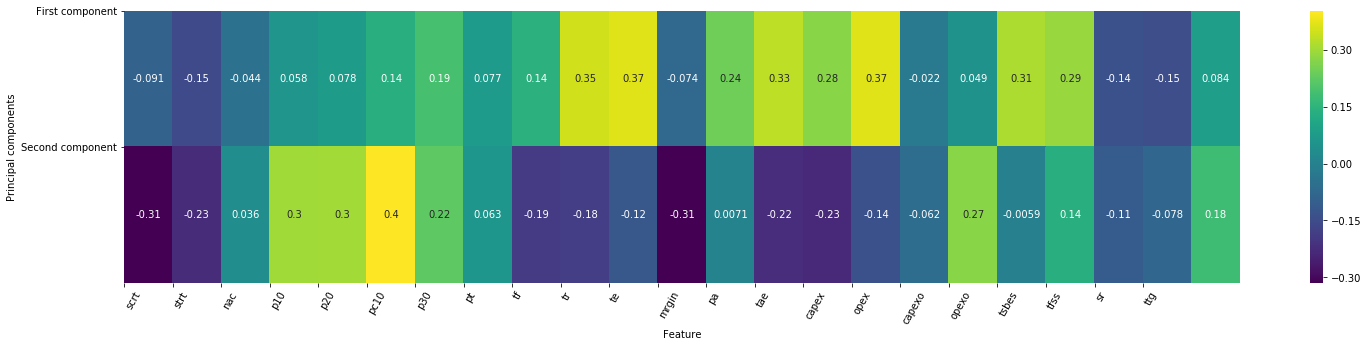

In [556]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Visualize coefficients using heat map
plt.figure(figsize=[25,5])
sns.heatmap(pca_model.components_[0:2,:],annot=True,cmap='viridis')
plt.yticks([0,1],["First component","Second component"],rotation=360,ha="right")
plt.xticks(range(len(feature_cols)),feature_cols,rotation=60,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [557]:
# make class predictions for the testing set
y_pred_class_pca = pcalg.predict(test_pca)

In [558]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class_pca))
print (metrics.precision_recall_fscore_support(y_test, y_pred_class_pca, average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_class_pca))

0.5714285714285714
(0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
[[0 4]
 [2 8]]


In [559]:
#Prediction with SVC model
clf=SVC(kernel='linear',C=164, decision_function_shape='ovr')
model=clf.fit(train_pca,y_train)
y_pred=model.predict(test_pca)
clf

SVC(C=164, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [560]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6428571428571429
[[0 4]
 [1 9]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         4
          1       0.69      0.90      0.78        10

avg / total       0.49      0.64      0.56        14

